In [6]:
import pandas as pd
import geopandas as gpd
import numpy as np
import pyproj
from fiona.crs import from_epsg

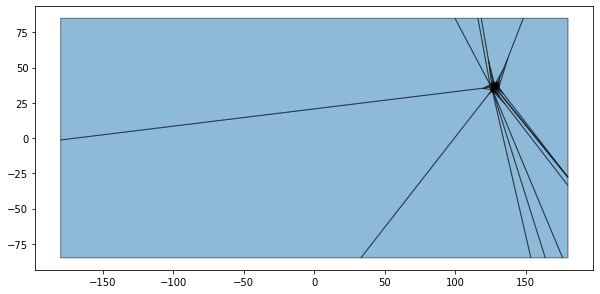

In [11]:
voronoi = gpd.read_file('../data/kr_village_voronoi.json')
voronoi.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

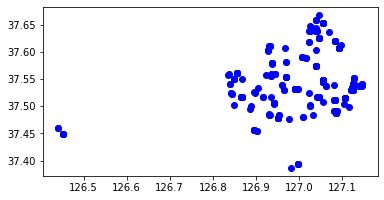

In [15]:
# 확진자 동선 로드
route_original = gpd.read_file('../data/hidden/patient_route_0824.csv')
route = route_original
# 좌표 결측값 제거
route = route.replace('', np.nan).dropna(subset=['Latitude', 'Longitude'])
route_geom = gpd.points_from_xy(route.Longitude, route.Latitude)
route_frame = gpd.GeoDataFrame(route, geometry=route_geom, crs=from_epsg(4326))
route_frame.plot(color='blue')

In [16]:
cell_data = {}
for index, row in route_frame.iterrows():
    cell_data[index] = list(voronoi[voronoi.contains(row.geometry)]['cellid'])[0]
'''emdl_series = pd.Series(list(emdl_data.values()), index=list(emdl_data.keys()), dtype=np.dtype("int32"))
route_series = pd.Series(list(route_data.values()), index=list(route_data.keys()))
route_frame.assign(emdlid=emdl_series)
route_frame.assign(route_series)'''
route_frame['CellID'] = pd.Series(list(emdl_data.values()), index=list(emdl_data.keys()), dtype=np.dtype("int32"))
#route_frame.join(route_original)
route_frame

ID PatientID              Time Order Country Province      City  \
0      0     10977   2020-05-09 0:00     0   Korea    Seoul    Songpa   
1      1     10977  2020-05-12 18:15     1   Korea    Seoul    Songpa   
2      2     10977  2020-05-12 19:13     2   Korea    Seoul    Songpa   
3      3     10980   2020-05-06 8:00     0   Korea    Seoul   Gangseo   
4      4     10980   2020-05-06 8:50     1   Korea    Seoul   Gangseo   
..   ...       ...               ...   ...     ...      ...       ...   
410  410     11174  2020-05-21 22:00    24   Korea    Seoul  Jungnang   
411  411     11174  2020-05-22 11:10    26   Korea    Seoul  Jungnang   
412  412     11174  2020-05-22 12:15    27   Korea    Seoul  Jungnang   
413  413     11184   2020-05-19 0:00     0   Korea    Seoul     Nowon   
415  415     11184  2020-05-22 18:00     2   Korea    Seoul     Nowon   

     PlaceType      PlaceName LocationLevel    Latitude    Longitude  \
0          NaN             자택             4    37.51457    127.10602   
1          NaN  송파구 보건소 선별진료소            10  37.5145247  127.1066723   
2          NaN             자택             4    37.51457    127.10602   
3          NaN            가양역            10  37.5610584  126.8550738   
4          NaN            서울역            10    37.55453     126.9708   
..         ...            ...           ...         ...          ...   
410        NaN             자택             4   37.606517   127.092656   
411        NaN  중랑구 보건소 선별진료소            10   37.606515   127.092633   
412        NaN             자택             4   37.606517   127.092656   
413        NaN             자택             4    37.65403   127.056284   
415        NaN             자택             4    37.65403   127.056284   

     LocationID ConfirmDate         Group  \
0           NaN  2020-05-13  itaewon club   
1           NaN  2020-05-13  itaewon club   
2           NaN  2020-05-13  itaewon club   
3           NaN  2020-05-13  itaewon club   
4           NaN  2020-05-13  itaewon club   
..          ...         ...           ...   
410         NaN  2020-05-23  itaewon club   
411         NaN  2020-05-23  itaewon club   
412         NaN  2020-05-23  itaewon club   
413         NaN  2020-05-23  itaewon club   
415         NaN  2020-05-23  itaewon club   

                                                  Memo  \
0                    5월 9일 ~ 5월 11일:  자가격리 중으로 외출하지 않음   
1               18:15∼18:50 송파구 보건소 선별진료소(자차) / 마스크 착용   
2                              19:13 집(엘리베이터) / 마스크 착용   
3                    08:00~08:50 가양역 - 노량진역 - 서울역(지하철)   
4                    08:00~08:50 가양역 - 노량진역 - 서울역(지하철)   
..                                                 ...   
410                       22:00 직장 퇴근 후 배우자 차량으로 자택 이동   
411                       11:10~11:35 중랑구보건소 선별진료소(도보)   
412                                         12:15 집 도착   
413  5월 19일(화)~5월 21일(목): 자가격리(하루종일 자택) ※ 5.16(토)부터...   
415                        18:00~ 귀가 후 머무름(보건소 구급차 이용)   

                       geometry  emdlid  
0    POINT (127.10602 37.51457)   18769  
1    POINT (127.10667 37.51452)   18769  
2    POINT (127.10602 37.51457)   18769  
3    POINT (126.85507 37.56106)    7959  
4    POINT (126.97080 37.55453)    8151  
..                          ...     ...  
410  POINT (127.09266 37.60652)    8309  
411  POINT (127.09263 37.60652)    8309  
412  POINT (127.09266 37.60652)    8309  
413  POINT (127.05628 37.65403)    8318  
415  POINT (127.05628 37.65403)    8318  

[337 rows x 18 columns]

In [6]:
route_frame.drop('geometry', axis=1).to_csv('patient_route_emdlid_output.csv') 

In [7]:
output = {}
for index, row in route_frame.iterrows():
    emdlid = list(voronoi[voronoi.contains(row.geometry)]['emdlid'])[0]
    output[index] = route_original.loc[index]
    output[index].emdlid = emdlid
output[index][:, 'geometry'] = pd.Series()
output

ValueError: Can only tuple-index with a MultiIndex

In [8]:
route_original.loc[0]

ID                                               0
PatientID                                    10977
Time                               2020-05-09 0:00
Order                                            0
Country                                      Korea
Province                                     Seoul
City                                        Songpa
PlaceType                                         
PlaceName                                       자택
LocationLevel                                    4
Latitude                                  37.51457
Longitude                                127.10602
LocationID                                        
ConfirmDate                             2020-05-13
Group                                 itaewon club
Memo             5월 9일 ~ 5월 11일:  자가격리 중으로 외출하지 않음
geometry                                      None
Name: 0, dtype: object